In [5]:
%pylab inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

from hamsci import rbn_lib
import datetime

def to_cmap(my_cdict,name='CustomCMAP',vmin=0.,vmax=30.):
    norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
    
    red   = []
    green = []
    blue  = []
    
    keys = my_cdict.keys()
    keys.sort()
    
    for x in keys:
        r,g,b, = my_cdict[x]
        x = norm(x)
        r = r/255.
        g = g/255.
        b = b/255.
        red.append(   (x, r, r))
        green.append( (x, g, g))
        blue.append(  (x, b, b))
    cdict = {'red'   : tuple(red),
             'green' : tuple(green),
             'blue'  : tuple(blue)}
    cmap  = LinearSegmentedColormap(name, cdict)
    return cmap

cc = matplotlib.colors.ColorConverter().to_rgb
vmin, vmax = 0.,30.
def cc255(color):
    trip = np.array(cc(color))*255
    trip = [int(x) for x in trip]
    return tuple(trip)

Populating the interactive namespace from numpy and matplotlib


In [6]:
sTime = datetime.datetime(2015,11,7)
eTime = datetime.datetime(2015,11,7,1)
latlon_bnds = {'llcrnrlat':20.,'llcrnrlon':-130.,'urcrnrlat':55.,'urcrnrlon':-65.}

rbn_obj  = rbn_lib.RbnObject(sTime,eTime)
rbn_obj.active.latlon_filt(**latlon_bnds)
rbn_grid = rbn_obj.active.create_geo_grid()
rbn_grid.grid_mean()

Starting RBN processing on <20151107.zip> at 2016-08-01 11:13:40.750519.


Exception: Username/password incorrect 

In [7]:
cc255('tomato')

(255, 99, 71)

In [8]:
fc = {}
fc[ 0.0] = (  0,   0,   0)
fc[ 1.8] = cc255('violet')
fc[ 3.0] = cc255('blue')
fc[ 8.0] = cc255('aqua')
fc[10.0] = cc255('green')
fc[13.0] = cc255('green')
fc[17.0] = cc255('yellow')
fc[21.0] = cc255('orange')
fc[28.0] = cc255('red')
fc[30.0] = cc255('red')
cmap = to_cmap(fc,vmin=vmin,vmax=vmax)

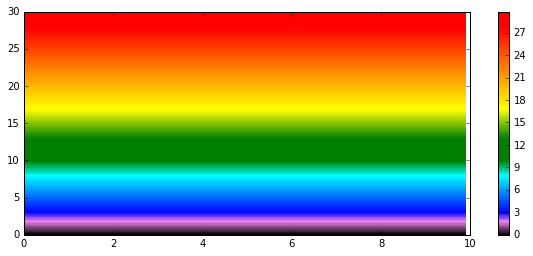

In [9]:
x = np.arange(0, 10, 0.1)
y = np.arange(0, 30, 0.1)
X, Y = np.meshgrid(x, y)
Z = Y

# Make the figure:
plt.figure(figsize=(10, 4))
plt.subplot(111)
plt.pcolormesh(X,Y,Z,cmap=cmap)
plt.colorbar()
plt.show()

NameError: name 'rbn_obj' is not defined

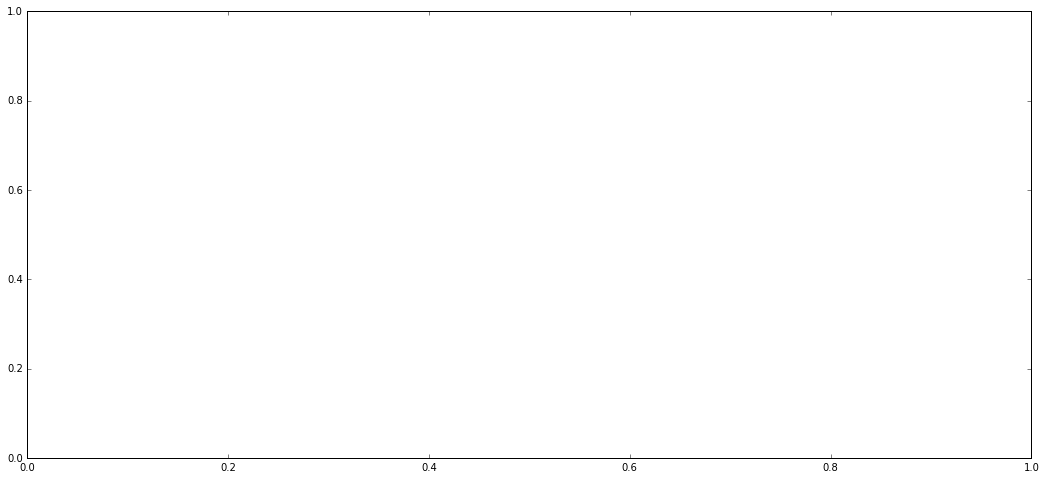

In [10]:
band_data = rbn_lib.BandData(cmap=cmap,vmin=vmin,vmax=vmax)
fig = plt.figure(figsize=(18,8))
ax  = fig.add_subplot(111)
rbn_map = rbn_lib.RbnMap(rbn_obj,band_data=band_data,ax=ax)
rbn_map.overlay_grid(rbn_grid)
rbn_map.overlay_grid_data(rbn_grid,cmap=cmap,vmin=vmin,vmax=vmax)